## Average distance in unit square - via probability density function for the distance
Approach is to determine the probability density function (pdf) for the squared distance, and from that the pdf for the distance

This results in an analytical explicit expression for the desired pdf. 

From that pdf, calculate the avarage distance

Sympy can handle all these analytical calculations

In [48]:
import sympy
from sympy import *
x, y, s, sq = symbols('x y s sq', positive=True) #, real=True)

## 1 Random distances on unit interval
Assume a random point $x$ on unit interval [0,1] and uniform probability density $pd_1(x) = \theta(x) \theta(1-x)$, where $\theta(x)$ is the step function (Heaviside function).

In [49]:
# Note: declaring s as always positive above impacts step function calculations below
pd1 = Lambda(x, Heaviside(x) * Heaviside(1-x))
pd1

Lambda(x, Heaviside(1 - x))

Calculate probability density of distance $s = abs(x-y)$. Assuming a positive s only, need factor of 2 because each absolute value of $s$ can be realized in two ways. The probability density is given by $\int_{0}^{1} 2 pd_1(x) pd_1(s+x) dx$ (convolution).

In [50]:
PD1_S = Lambda(s, 2*integrate(pd1(x)*pd1(s+x),(x,0,1))).simplify()
PD1_S       

Lambda(s, 2*(1 - s)*Heaviside(1 - s))

In [51]:
# remove the step function, assuming that argument is always in [0..1], so value always 1
PD1_S = Lambda(s, PD1_S(s).subs(Heaviside(1-s),1))
PD1_S

Lambda(s, 2 - 2*s)

In [52]:
# Verify that total cumulated probabity is 1
integrate(PD1_S(s), (s,0,1))

1

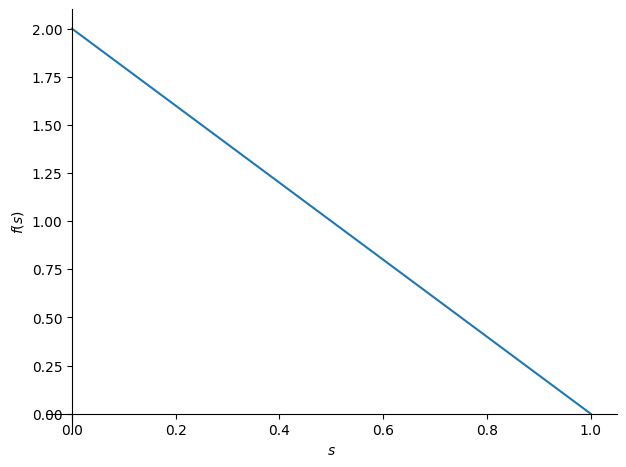

In [53]:
plot(PD1_S(s), (s, 0, 1))

In [54]:
# Calculate mean length on unit interval using the probability distribution
MeanDistance1_S = integrate(PD1_S(s)*s, (s,0,1))
MeanDistance1_S

1/3

In [55]:
# As a check, calculate mean length directly as double integral over random points on unit line
integrate(abs(x-y), (x,0,1), (y,0,1))

1/3

In [56]:
# calculate variance
Variance1_S = integrate(PD1_S(s)*(s-MeanDistance1_S)**2, (s,0,1))
Variance1_S

1/18

In [57]:
# Check by direct integration
integrate((abs(x-y)-MeanDistance1_S)**2, (x,0,1), (y,0,1))

1/18

In [58]:
# calculate standard deviation

In [59]:
StDev1_S = sqrt(Variance1_S)
StDev1_S

sqrt(2)/6

In [60]:
StDev1_S.evalf()

0.235702260395516

In [61]:
# calculate mean Square distance
MeanSquareDistance1 = integrate(PD1_S(s)*s**2, (s,0,1))
MeanSquareDistance1

1/6

Now determine the probability density of $s^2$. Follow theorem 14 (transformation of a random variable) in https://imai.fas.harvard.edu/teaching/files/Expectation.pdf: 
$$f_y(y) = f_x(g^{-1}(y))\left|{\frac{d}{dy} g^{-1}(y)}\right|$$
where $f_x(x)$ is the probability density of $x$, $g(x)$ is the transformation function $y = g(x)$, and $f_y(y)$ is the resulting probability density of $y$. Here we have the transformation function $g(x) = x^2$, with the inverse  function $g^{-1}(y) = \sqrt{y}$

In [62]:
# Inverse of Square (inverse of mapping (transformation) function)
SqMapInverse = Lambda(s, sqrt(s))
SqMapInverse

Lambda(s, sqrt(s))

In [63]:
# Probability density function of y = s^2
PD1_Sq = Lambda(y, PD1_S(SqMapInverse(y)) * (diff(SqMapInverse(y))))
PD1_Sq

Lambda(y, (2 - 2*sqrt(y))/(2*sqrt(y)))

In [64]:
PD1_Sq = PD1_Sq.factor()
PD1_Sq

Lambda(y, -1 + 1/sqrt(y))

In [65]:
# verify that total cumulative probability is 1 (step function substituted to 1 as always 1 in domain)
integrate(PD1_Sq(y), (y,0,1))

1

In [66]:
# verify that mean value of y = s^2 is 1/6
integrate(PD1_Sq(y)*y, (y,0,1))

1/6

In [67]:
# Variance of y = s^2
Variance1_Sq = integrate(PD1_Sq(y)*(y-MeanSquareDistance1)**2, (y,0,1))
Variance1_Sq

7/180

In [68]:
# standard deviation
StdDev1_Sq = sqrt(Variance1_Sq)
StdDev1_Sq

sqrt(35)/30

In [69]:
StdDev1_Sq.evalf()

0.197202659436654

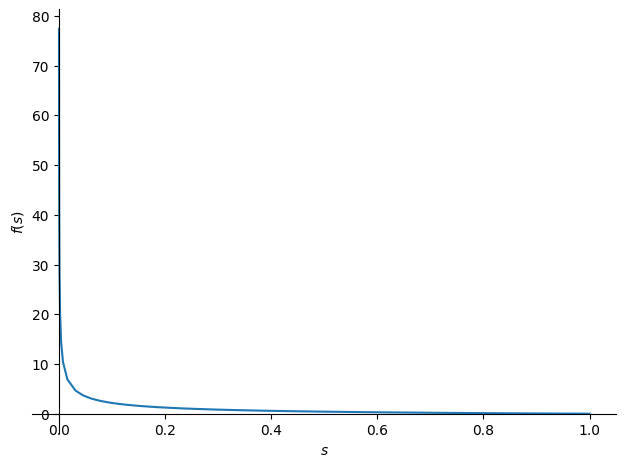

In [70]:
plot(PD1_Sq(s), (s,0,1))

### 2 Random distances in unit square

A random distance $s$ in a unit square is calculated from $s^2 = s_x^2 + s_y^2$, where $s_x$ and $s_y$ are both following the probability density function $pds_1$ calculated above for a distance in the unit inverval. Furthermore, we have also the probability density function $pdsq_1$ for the squared distance, and we can use that to calculate the probability density $pdsq_2(sq)$ for $sq = s^2$ as:

$$pdsq_2(sq) = \int_{0}^{sq} pdsq_1(x) \theta(1-x) pdsq_1(sq-x) \theta(1-sq+x) dx$$

The upper integration limit must be $sq$ as the square can never be negative, and more precisely, must be $min(1,sq)$ as $sq$ can be $> 1$ (and $< 2$), but argument of $pdsq_1$ must be in [0,1]. The step functions ensure that the arguments of the probability density function are within the relevant domain.

In [71]:
# Calculate probability density function of s^2 = x+y, where s is the two-dim distance
# Note that upper integration limit must be sq as square can never be negative, and
# more precisely, must be min(1,sq) as sq can be > 1 (< 2), but argument of PD_Sq must be in [0,1]
PD2_Sq = Lambda(sq, Integral(PD1_Sq(x)*Heaviside(1-x)*PD1_Sq(sq-x)*Heaviside(1-sq+x),(x,0,sq)).doit())
PD2_Sq

Lambda(sq, -(2*sqrt(sq) - 2*sqrt(sq - 1) - (sq - 4*sqrt(sq - 1) - 2*asin(1/sqrt(sq)) + 2*asin(sqrt(sq - 1)/sqrt(sq)) + 2)*Heaviside(2 - sq) - 2*asin(1/sqrt(sq)) + 1)*Heaviside(1 - sq) - (sq - 4*sqrt(sq - 1) - 2*asin(1/sqrt(sq)) + 2*asin(sqrt(sq - 1)/sqrt(sq)) + 2)*Heaviside(2 - sq) + (-2*sqrt(sq) + sq - 2*sqrt(sq - 1) - 2*asin(1/sqrt(sq)) + 1 + pi)*Heaviside(1 - sq))

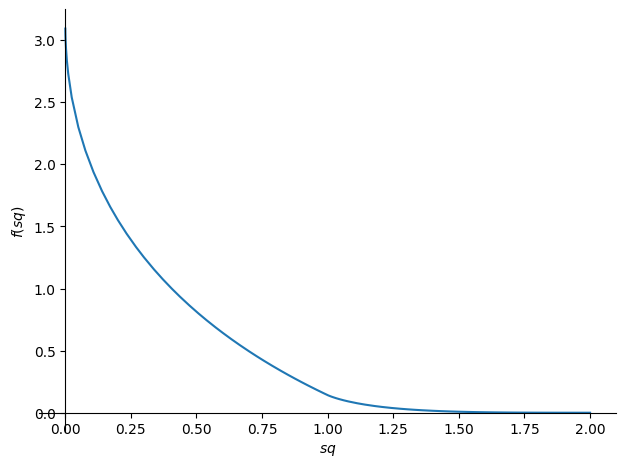

In [72]:
plot(PD2_Sq(sq), (sq,0,2))

In [73]:
# for 0 < sq < 1:
PD2_sq_a = (PD2_Sq(sq).subs(Heaviside(1-sq),1).subs(Heaviside(2-sq),1))
PD2_sq_a

-4*sqrt(sq) + sq + pi

In [74]:
# for 1 < sq < 2:
PD2_sq_b = (PD2_Sq(sq).subs(Heaviside(1-sq),0).subs(Heaviside(2-sq),1))
PD2_sq_b

-sq + 4*sqrt(sq - 1) + 2*asin(1/sqrt(sq)) - 2*asin(sqrt(sq - 1)/sqrt(sq)) - 2

In [75]:
# value at sq = 0
PD2_sq_a.subs(sq,0)

pi

In [76]:
PD2_sq_a.subs(sq,1)

-3 + pi

In [77]:
PD2_sq_b.subs(sq,1)

-3 + pi

In [78]:
# value at sq = 2
PD2_sq_b.subs(sq,2)

0

In [79]:
integrate(PD2_sq_a, (sq,0,1))

-13/6 + pi

In [80]:
integrate(PD2_sq_b, (sq,1,2))

19/6 - pi

In [81]:
# verify that total probability is 1 
integrate(PD2_sq_a, (sq,0,1)) + integrate(PD2_sq_b, (sq,1,2))

1

Now determine probability density of $s = \sqrt{sq}$. Mapping function is $\sqrt{sq}$ and the inverse mapping function is $s^2$.

In [82]:
# Transform PD2_Sq to PD2_S, with sqrt as mapping function
# Inverse of sqrt (inverse of mapping function)
SqrtMapInverse = Lambda(s, s**2)
SqrtMapInverse

Lambda(s, s**2)

In [83]:
# Probability density function of s = sqrt(sq)
PD2_S = Lambda(s, PD2_Sq(SqrtMapInverse(s)) * (diff(SqrtMapInverse(s))))
PD2_S

Lambda(s, 2*s*(-(2*s - 2*sqrt(s**2 - 1) - (s**2 - 4*sqrt(s**2 - 1) - 2*asin(1/s) + 2*asin(sqrt(s**2 - 1)/s) + 2)*Heaviside(2 - s**2) - 2*asin(1/s) + 1)*Heaviside(1 - s**2) - (s**2 - 4*sqrt(s**2 - 1) - 2*asin(1/s) + 2*asin(sqrt(s**2 - 1)/s) + 2)*Heaviside(2 - s**2) + (s**2 - 2*s - 2*sqrt(s**2 - 1) - 2*asin(1/s) + 1 + pi)*Heaviside(1 - s**2)))

In [84]:
PD2_S(sqrt(2))

0

In [85]:
PD2_S(1)

-6 + 2*pi

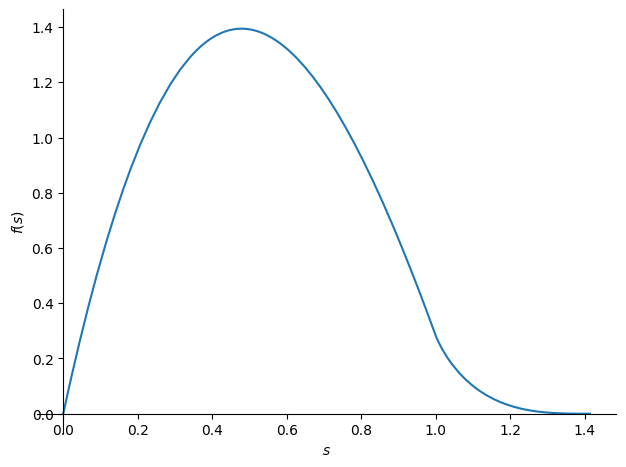

In [86]:
plot(PD2_S(s), (s,0,sqrt(2)))

In [87]:
PD2_S.expand(s)

Lambda(s, 2*s**3*Heaviside(1 - s**2)*Heaviside(2 - s**2) + 2*s**3*Heaviside(1 - s**2) - 2*s**3*Heaviside(2 - s**2) - 8*s**2*Heaviside(1 - s**2) - 8*s*sqrt(s**2 - 1)*Heaviside(1 - s**2)*Heaviside(2 - s**2) + 8*s*sqrt(s**2 - 1)*Heaviside(2 - s**2) - 4*s*Heaviside(1 - s**2)*Heaviside(2 - s**2)*asin(1/s) + 4*s*Heaviside(1 - s**2)*Heaviside(2 - s**2)*asin(sqrt(s**2 - 1)/s) + 4*s*Heaviside(1 - s**2)*Heaviside(2 - s**2) + 2*pi*s*Heaviside(1 - s**2) + 4*s*Heaviside(2 - s**2)*asin(1/s) - 4*s*Heaviside(2 - s**2)*asin(sqrt(s**2 - 1)/s) - 4*s*Heaviside(2 - s**2))

In [88]:
PD2_S.simplify()

Lambda(s, 2*s*((-2*s + 2*sqrt(s**2 - 1) + (s**2 - 4*sqrt(s**2 - 1) - 2*asin(1/s) + 2*asin(sqrt(s**2 - 1)/s) + 2)*Heaviside(2 - s**2) + 2*asin(1/s) - 1)*Heaviside(1 - s**2) - (s**2 - 4*sqrt(s**2 - 1) - 2*asin(1/s) + 2*asin(sqrt(s**2 - 1)/s) + 2)*Heaviside(2 - s**2) + (s**2 - 2*s - 2*sqrt(s**2 - 1) - 2*asin(1/s) + 1 + pi)*Heaviside(1 - s**2)))

In [89]:
# Probability density for s < 1 (step function is 1 everywhere)
PD2_Sa = Lambda(s, PD2_S(s).subs(Heaviside(1-s**2),1).expand())
PD2_Sa

Lambda(s, 2*s**3 - 8*s**2 + 2*pi*s)

In [90]:
simplify(PD2_Sa)

Lambda(s, 2*s*(s**2 - 4*s + pi))

In [91]:
# Probability density for s > 1 (step function is 0 for s < 1, and 1 for s > 1)
PD2_Sb = Lambda(s, PD2_S(s).subs(Heaviside(1-s**2),0).subs(Heaviside(2-s**2),1).expand())
PD2_Sb

Lambda(s, -2*s**3 + 8*s*sqrt(s**2 - 1) + 4*s*asin(1/s) - 4*s*asin(sqrt(s**2 - 1)/s) - 4*s)

In [122]:
simplify(PD2_Sb)

Lambda(s, 2*s*(-s**2 + 4*sqrt(s**2 - 1) + 2*asin(1/s) - 2*asin(sqrt(s**2 - 1)/s) - 2))

In [92]:
# probability of length s < 1:
ProbSa = integrate(PD2_Sa(s), (s,0,1))
ProbSa

-13/6 + pi

In [93]:
# probability of length s > 1:
ProbSb = integrate(PD2_Sb(s), (s,1,sqrt(2)))
ProbSb

19/6 - pi

In [94]:
# total probability should be 1
ProbSa + ProbSb

1

In [95]:
PD2_Sa(1)

-6 + 2*pi

In [96]:
PD2_Sb(1)

-6 + 2*pi

In [97]:
PD2_Sb(sqrt(2))

0

In [98]:
MeanDistance2_Sa = integrate(PD2_Sa(s)*s, (s,0,1))
MeanDistance2_Sa 

-8/5 + 2*pi/3

In [99]:
MeanDistance2_Sb = integrate(PD2_Sb(s)*s, (s,1,sqrt(2)))
MeanDistance2_Sb 

-2*pi/3 + sqrt(2)/15 + log(1 + sqrt(2))/3 + 26/15

In [100]:
MeanDistance2_S = MeanDistance2_Sa + MeanDistance2_Sb
MeanDistance2_S 

sqrt(2)/15 + 2/15 + log(1 + sqrt(2))/3

In [101]:
MeanDistance2_S.evalf()

0.521405433164721

In [102]:
MeanDistance2_S.rewrite(log).simplify()

sqrt(2)/15 + 2/15 + log(1 + sqrt(2))/3

In [103]:
MeanSquare_Sa = integrate(PD2_Sa(s)*s**2, (s,0,1))
MeanSquare_Sa 

-19/15 + pi/2

In [104]:

MeanSquare_Sb = integrate(PD2_Sb(s)*s**2, (s,1,sqrt(2)))
MeanSquare_Sb 

8/5 - pi/2

In [105]:
MeanSquare_S = MeanSquare_Sa + MeanSquare_Sb
MeanSquare_S

1/3

In [106]:
MeanSquare_S.evalf()

0.333333333333333

In [107]:
Variance_S = (MeanSquare_S - MeanDistance2_S**2)
Variance_S

1/3 - (sqrt(2)/15 + 2/15 + log(1 + sqrt(2))/3)**2

In [108]:
Variance_S.evalf()

0.0614697075996433

In [109]:
expr = Variance_S.rewrite(log).expand().simplify().collect(log(1+sqrt(2)))
expr

(-4/45 - 2*sqrt(2)/45)*log(1 + sqrt(2)) - log(1 + sqrt(2))**2/9 - 4*sqrt(2)/225 + 23/75

In [110]:
expand_log(log((1+sqrt(2))**2))

2*log(1 + sqrt(2))

In [111]:
expand_log(Variance_S.rewrite(log).simplify().expand())

-log(1 + sqrt(2))**2/9 - 4*log(1 + sqrt(2))/45 - 2*sqrt(2)*log(1 + sqrt(2))/45 - 4*sqrt(2)/225 + 23/75

In [112]:
# Standard deviation
sqrt(Variance_S).evalf()

0.247930852456170

In [113]:
sqrt(Variance_S).rewrite(log).simplify().expand().collect(log(1+sqrt(2)))

sqrt((-20 - 10*sqrt(2))*log(1 + sqrt(2)) - 25*log(1 + sqrt(2))**2 - 4*sqrt(2) + 69)/15

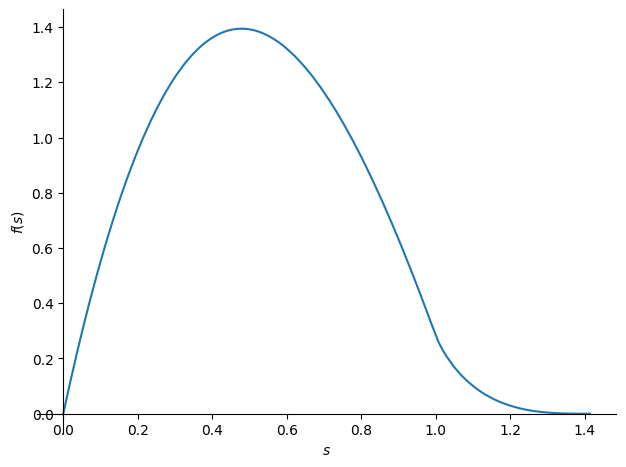

In [114]:
plot(PD2_Sa(s)*Heaviside(1-s) + PD2_Sb(s)*Heaviside(s-1), (s,0,sqrt(2)))

In [115]:
# Most likely distance (maximum probability density)
solve(diff(PD2_Sa(s)),s)[0]

4/3 - sqrt(16 - 3*pi)/3

In [116]:
_.evalf()

0.478593474322897

In [117]:
# Median distance
# cumulative probability density:
CDF2 = Lambda(x, integrate(PD2_Sa(s), (s,0,x)))
CDF2

Lambda(x, x**4/2 - 8*x**3/3 + pi*x**2)

In [118]:
# Median distance is where CDF2 is 1/2:
MedianDistance = solve(CDF2(x) - Rational(1,2),x)[3].simplify()
MedianDistance

4/3 - sqrt(-12*pi + 64 + 6*pi**2/(-48 + 9*pi + pi**3 + sqrt(3)*sqrt(-32*pi**3 - 288*pi + 18*pi**2 + 777 + 9*pi**4))**(1/3) - 18/(-48 + 9*pi + pi**3 + sqrt(3)*sqrt(-32*pi**3 - 288*pi + 18*pi**2 + 777 + 9*pi**4))**(1/3) + 6*(-48 + 9*pi + pi**3 + sqrt(3)*sqrt(-32*pi**3 - 288*pi + 18*pi**2 + 777 + 9*pi**4))**(1/3))/6 + sqrt(-24*pi + 128 - 6*(-48 + 9*pi + pi**3 + sqrt(3)*sqrt(-32*pi**3 - 288*pi + 18*pi**2 + 777 + 9*pi**4))**(1/3) + 18/(-48 + 9*pi + pi**3 + sqrt(3)*sqrt(-32*pi**3 - 288*pi + 18*pi**2 + 777 + 9*pi**4))**(1/3) + 144*sqrt(2)*pi/sqrt(-6*pi + 32 + 3*pi**2/(-48 + 9*pi + pi**3 + sqrt(3)*sqrt(-32*pi**3 - 288*pi + 18*pi**2 + 777 + 9*pi**4))**(1/3) - 9/(-48 + 9*pi + pi**3 + sqrt(3)*sqrt(-32*pi**3 - 288*pi + 18*pi**2 + 777 + 9*pi**4))**(1/3) + 3*(-48 + 9*pi + pi**3 + sqrt(3)*sqrt(-32*pi**3 - 288*pi + 18*pi**2 + 777 + 9*pi**4))**(1/3)) - 512*sqrt(2)/sqrt(-6*pi + 32 + 3*pi**2/(-48 + 9*pi + pi**3 + sqrt(3)*sqrt(-32*pi**3 - 288*pi + 18*pi**2 + 777 + 9*pi**4))**(1/3) - 9/(-48 + 9*pi + pi**3 

In [119]:
MedianDistance.evalf()

0.512003269083334 - 1.43458047061161e-28*I

In [120]:
# the third root seems to be the relevant one; expression is very complex, can it be simplified?
#im(_)